# Laboratorium 12 - Równania różniczkowe i zagadnienie początkowe

##### Aleksandra Mazur

## Zadanie 1 Metoda Rungego-Kutty

#### Zaimplementuj metodę Rungego-Kutty czwartego rzędu (rozdział 10.2, Kincaid i Cheney). 

Metoda Rungego-Kutty to metoda numeryczna do iteracyjnego rozwiązywania równań różniczkowych zwyczajnych. Jest stosowana głównie w symulacjach fizycznych. Metoda Rungego-Kutty 4. rzędu jest powszechnie stosowana ze względu na prostotę implementacji, relatywnie proste wzory, dużą szybkość i wysoki rząd metody.

W zadaniach skorzystano z następujących bibliotek:
* math
* sympy
* numpy
* matplotlib

In [1]:
import math
import sympy
import numpy as np
import matplotlib.pyplot as plt

Funkcja **runge_kutta** implementuje metodę *Rungego-Kutty czwartego rzędu*.

Przyjmuje następujące argumenty:
* f - funkcja
* t - początek przedziału
* x - wartość funkcji w punkcie t
* h - rozmiar kroku
* n - liczba kroków

Funkcja wyznacza dla każdego *j* od 1 do *n* przybliżoną wartość rozwiązania *x*, generując kolejne punkty. Zwraca liczbę kroków *j*, koniec przedziału *t* i uzyskaną wartość *x*.

In [2]:
def runge_kutta(f, t, x, h, n):
    t_a = t
    
    j = 1
    for j in range(1, n + 1):
        k1 = h * f(t, x) 
        k2 = h * f(t + 0.5 * h, x + 0.5 * k1) 
        k3 = h * f(t + 0.5 * h, x + 0.5 * k2) 
        k4 = h * f(t + h, x + k3)
        
        x = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
        t = t_a + j * h 
    return j, t, x

Rząd tej metody jest równy 4, ponieważ błąd wzoru przybliżonego $ x(t + h) \approx x(t) + \frac{1}{6}(k1 + 2k2 + 2k3 + k4)$ wynosi $O(h^5)$.

#### 1. Opisz zalety metody Rungego-Kutty w porównaniu do metody z szeregami Taylora.

Metoda Rungego-Kutty jest dokładniejsza, stabilniejsza i łatwiejsza do zaprogramowania w porównaniu z metodą z szeregami Taylora. Nie wymaga wcześniejszego znania i obliczenia wyższych pochodnych funkcji.  Jest łatwiejsza do automatycznej kontroli błędów. Można w niej łatwo sterować wielkością błędu lokalnego, zmniejszając i zwiększając *h*.

#### 2. Rozwiąż zagadnienie początkowe dane równaniem $x' = x/t + tsec(x/t)$ z warunkiem początkowym $x(0) = 0$. Przedłuż rozwiązanie do $t = 1$ z krokiem $h = 2^{-7}$. Porównaj wynik z dokładnym rozwiązaniem: $x(t) = t ∗ arcsin(t)$.

**df1** to funkcja $x' = x/t + tsec(x/t)$

**f1** to funkcja $x(t) = t ∗ arcsin(t)$

In [3]:
def df1(t, x):
    return x / t + t * sympy.sec(x / t)
def f1(t):
    return t * np.arcsin(t)

Funkcja **solve2** rozwiązuje problem przedstawiony w poleceniu, korzystając z funkcji **runge_kutta** dla $h = 2^{-7}$ i wypisuje uzyskane rezultaty oraz porównuje je z dokładnym rozwiązaniem. Za początek przedziału przyjęto punkt $10^{-20}$ z uwagi na dzielenie przez 0.

In [4]:
def solve2():
    a = 10 **(-20) # początek przedziału
    x = 0 # wartość funkcji w punkcie 0
    h = 2 ** (-7) # krok
    t = 1 # koniec przedziału
    n = (int)((t - a) / h) # liczba kroków
    
    j, t, x = runge_kutta(df1, a, x, h, n)
    
    print("Implemented function:")
    print("Number of steps (j): ", j)
    print("End of interval (t): ", t)
    print("Counted result (x): ", x)
    
    print("")
    
    real_x = f1(1)
    print("Real result:")
    print(real_x)
    
    print("")
    
    print("Absolute error: ", abs(real_x - x))
    print("Relative error: ", 100 * abs(real_x - x)/real_x, "%")

In [5]:
solve2()

Implemented function:
Number of steps (j):  128
End of interval (t):  1.0
Counted result (x):  1.51912512047707

Real result:
1.5707963267948966

Absolute error:  0.0516712063178248
Relative error:  3.28949116040120 %


### Wnioski:
Obliczona wartość nie wiele się różni od prawidłowego rozwiązania. Błąd bezwzględny jest mały - ok. 0.05, a błąd względny wynosi ok. 3 %. W zadanym przydziale i z danym rozmiarem kroku, algorytm wykonał 128 iteracji, zakańczając działanie na końcu przedziału. Metoda Rungego-Kutty daje zatem zadawalające rezultaty.

#### 3. Używając tej samej metody rozwiąż zagadnienie początkowe dane równaniem $x' = 100(sin(t) − x)$ z warunkiem początkowym $x(0) = 0$ na przedziale [0, 3] używając kroków o rozmiarach h = 0.015, 0.02, 0.025, 0.03. Opisz z czego wynikają różnice w rozwiązaniach.

**f2** to funkcja $x' = 100(sin(t) − x)$

In [6]:
def f2(t, x):
    return 100 * (math.sin(t) - x)

Funkcja **solve3** rozwiązuje problem przedstawiony w poleceniu, korzystając z funkcji **runge_kutta** dla różnych wartości *h* i wypisuje uzyskane rezultaty.

In [7]:
def solve3(hs):
    a = 0 # początek przedziału
    b = 3 # koniec przedziału
    x = 0 # wartość funkcji w punkcie 0
    
    for h in hs:
        n = (int)((b - a) / h) # liczba kroków
        
        j, t, x_res = runge_kutta(f2, a, x, h, n)
        
        print("For h = ", h)
        print("Number of steps (j): ", j)
        print("End of interval (t): ", t)
        print("Counted result (x): ", x_res)
        print("")

In [8]:
solve3([0.015, 0.02, 0.025, 0.03])

For h =  0.015
Number of steps (j):  200
End of interval (t):  3.0
Counted result (x):  0.15100302946456207

For h =  0.02
Number of steps (j):  150
End of interval (t):  3.0
Counted result (x):  0.15099613280114313

For h =  0.025
Number of steps (j):  120
End of interval (t):  3.0
Counted result (x):  0.15094316610112551

For h =  0.03
Number of steps (j):  100
End of interval (t):  3.0
Counted result (x):  672890582787.5087



### Wnioski:
Zwiększając rozmiar kroku, maleje ich liczba, co jest oczywiste ze względu na fakt, że są to wielkości odwrotnie proporcjonalne. Dla pierwszych 3 wartości *h* (0.015, 0.02, 0.025) uzyskana wartość jest bardzo podobna. Jednak dla h = 0.03 rezultat znacznie się różni, ponieważ wartość kroku jest za duża, aby uzyskać dokładny wynik, a stabilność algorytmu jest tracona.

Wyjaśnienie tego problemu znaleziono w książce "A First Course In Numerical Analysis" - drugie wydanie, Anthony Ralston, Philip Rabinowitz (http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/205_08_Ralston_-PA-first-course-in-numerical-analysis.pdf) na stronie 228. 

Dokładnym rozwiązaniem jest funkcja $$y(x) = \frac{sinx - 0.01 cosx + 0.01 e^{-100x}}{1.0001}$$
Jeżeli krok *h* jest mały to składnik $0.01e^{-100x}$ nie wnosi nic do rozwiązania, ale wpływa na przedział stabilności obliczeń. Aby zachować tą stabilność *h* musi być z przedziału (0, 0.0278), co wyjaśnia dlaczego dla h = 0.03 stabilność nie jest zachowana, a dla h = 0.025 - jest.

In [9]:
solve3([0.0277, 0.0278, 0.028])

For h =  0.0277
Number of steps (j):  108
End of interval (t):  2.9916
Counted result (x):  0.15570748820181943

For h =  0.0278
Number of steps (j):  107
End of interval (t):  2.9745999999999997
Counted result (x):  0.1718740864267439

For h =  0.028
Number of steps (j):  107
End of interval (t):  2.996
Counted result (x):  0.2174692460774293



Jak widać dla h = 0.0277 uzyskana wartość jest poprawna, a dla h >= 0.0278 stabilność jest tracona i błąd rozwiązania się zwiększa.

## Zadanie 2 Adaptacyjna metoda Rungego-Kutty-Fehlberga

#### Zaimplementuj adaptacyjną metodę Rungego-Kutty-Fehlberga (rozdział 10.3, Kincaid i Cheney) i użyj jej do rozwiązania zagadnienia początkowego: $x' = 3x/t + 9/2t − 13$ z warunkiem brzegowym $x(3) = 6$ w punkcie $x(1/2)$ z dokładnością do 9 miejsc po przecinku. Porównaj wynik z rozwiązaniem analitycznym $x = t^3 −9/2t^2 + 13/2t$. W jaki sposób metoda adaptacyjna pozwala nam zwiększyć dokładność rozwiązania? Jakie są tego wady?

Poniższe funkcje zaimplementowano na podstawie algorytmów przedstawionych w rozdziale 10.3 *Kincaid i Cheney*.

Funkcja **rk45** to implementacja metody *Rungego-Kutty-Fehlberga* (rzędu piątego), która stosuje metodę *Rungego-Kutty* rzędu czwartego, wymagającej obliczania pięciu wartości funkcji i metody rzędu piątego, w której trzeba obliczać sześć takich wartości.

Funkcja przyjmuje:
* f - funkcja f(t,x) równania różniczkowego
* t, x -wartości
* h - wartość kroku

Funkcja zwraca:
* t, x - obliczone wartości
* eps - błąd rozwiązania

In [10]:
def rk45(f, t, x, h):
    c20 = 0.25 
    c21 = 0.25
    c30 = 0.375 
    c31 = 0.09375
    c32 = 0.28125
    c40 = 12/13
    c41 = 1932/2197
    c42 = 7200/2197
    c43 = 7296/2197
    c51 = 439/216
    c52 = 8
    c53 = 3680/513
    c54 = 845/4104
    c60 = 0.5
    c61 = 8/27
    c62 = 2
    c63 = 3544/2565
    c64 = 1859/4104
    c65 = 0.275
    a1 = 25/216
    a2 = 0
    a3 = 1408/2565
    a4 = 2197/4104
    a5 = 0.2
    b1 = 16/135
    b2 = 0
    b3 = 6656/12825
    b4 = 28561/56430
    b5 = 0.18
    b6 = 2/55
    
    K1 = h * f (t, x)
    K2 = h * f(t + c20 * h, x + c21 * K1)
    K3 = h * f(t + c30 * h, x + c31 * K1 + c32 * K2)
    K4 = h * f(t + c40 * h, x + c41 * K1 + c42 * K2 + c43 * K3)
    K5 = h * f(t + h, x + c51 * K1 + c52 * K2 + c53 * K3 + c54 * K4)
    K6 = h * f(t + c60 * h, x + c61 * K1 + c62 * K2 + c63 * K3 + c64 * K4 + c65 * K5)
    
    x4 = x + a1 * K1 + a3 * K3 + a4 * K4 + a5 * K5
    x = x + b1 * K1 + b3 * K3 + b4 * K4 + b5 * K5 + b6 * K6
    x4 = round(x4, 9)
    x = round(x, 9)
    t = t + h
    eps = abs(x - x4)
    
    return t, x, eps

Funkcja **rk45_adaptive** to algorytm adaptacyjny *Rungego-Kutty-Fehlberga*, rozwiązujący zagadnienie początkowe $x' = f(t, x)$. 

Funkcja przyjmuje następujące argumenty:
* f - funkcja f(t,x) równania różniczkowego
* t, x - wartości początkowe
* h - początkowa wartość kroku
* itmax - maksymalna liczba iteracji
* eps_max, eps_min - górna i dolna granica dopuszczalnego błędu
* h_max, h_min - górna i dolna granica wartości kroku
* iflag - flaga błędu (0 - pomyślne przejście do następnego punktu t, 1 - maksymalna liczba iteracji została osiągnięta)

Funkcja zwraca:
* k - liczba iteracji
* t - koniec przedziału
* x - uzyskana wartość
* eps - błąd
* xs - wszystkie wartości x uzyskane w każdej iteracji

In [11]:
def rk45_adaptive(f, t, x, h, t_b, itmax, eps_max, eps_min, h_min, h_max, iflag=1):
    delta = 0.5 * 10**(-5)
    k=0
    xs = []
    
    while k <= itmax:
        k = k + 1
        if abs(h) < h_min:
            h = np.sign(h) * h_min
        if abs(h) > h_max:
            h = np.sign(h) * h_max
        d = abs(t_b - t)
        
        if d <= abs(h):
            iflag = 0
            if d <= delta * max(abs(t_b), abs(t)):
                break
            h = np.sign(h) * d
        
        x_save = x
        t_save = t
        t, x, eps = rk45(f, t, x, h)

        if iflag == 0:
            break
        if eps < eps_min:
            h = 2 * h
        if eps > eps_max:
            h = h/2
            x = x_save
            t = t_save
            k = k - 1
            
        xs.append(x)
        
        if np.allclose(2.25, x):
            print(k)
            
    return k, t, x, eps, xs

**df3** to funkcja $x' = 3x/t + 9/2t − 13$

**f3** to funkcja $x = t^3 −9/2t^2 + 13/2t$

In [12]:
def df3(t, x):
    return 3 * x / t + 9 * t / 2 - 13
def f3 (t):
    return t ** 3 - 9 * t ** 2 / 2 + 13 * t / 2

Funkcja **solve_rk45** rozwiązuje problem przedstawiony w treści zadania korzystając z zaimplementowanych funkcji, wypisuje osiągnięte rezultaty, liczy błąd obliczeń oraz rysuje wykres otrzymywanych wartości x przy każdej iteracji.

In [13]:
def solve_rk45():
    k, t, x, eps, xs = rk45_adaptive(f=df3, 
                                      t=3, # początek przedziału
                                      x=6, # wartość funkcji dla t
                                      h=(0.5-3)/50000, 
                                      t_b=0.5, # koniec przedziału
                                      itmax=50000, 
                                      eps_max=10**(-5), 
                                      eps_min=10**(-8), 
                                      h_min=10**(-8), 
                                      h_max=1.0, 
                                      iflag=1)
    real_x = f3(0.5)
    print("Real value: ", real_x)
    print("Counted_value: ", x)
    print("Absolute error: ", abs(real_x - x))
    print("Relative error: ", 100 * abs(real_x - x) / real_x, "%")
    print("Number of iteratons = ", k)
    print("End of interval = ", t)
    print("eps = ", eps)

    plt.plot([i for i in range(0, len(xs))], xs)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()

Real value:  2.25
Counted_value:  2.1455246
Absolute error:  0.10447540000000011
Relative error:  4.643351111111116 %
Number of iteratons =  44653
End of interval =  0.5
eps =  6.3439999999914676e-06


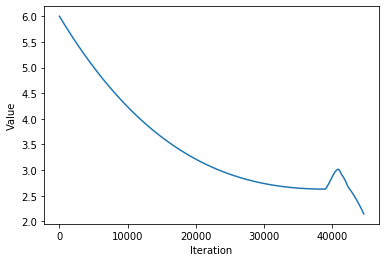

In [14]:
solve_rk45()

### Wnioski:
Uzyskany rezultat jest przybliżony do rzeczywistej wartości. Błąd bezwzględny wynosi ok. 0.1, a błąd względny jest rzędu 4.5 %.
Liczba iteracji potrzebna do osiągnięcia tego rezultatu wynosi nieco mniej niż 45 000. Algorytm prawidłowo zakończył się na końcu przedziału, czyli w punkcie 0.5. Na wykresie przedstawiono dodatkowo wartości uzyskiwane przy każdej iteracji algorytmu. Widać, że wartości te wykazywały tendencję malejącą. Osiągnięty rezultat zależy więc od liczby iteracji i długości kroku.

W metodzie adaptacyjnej *Rungego-Kutty-Fehlberga* możemy w łatwy sposób oszacować błąd. Jego zakres jest podany jako argument funkcji i dzięki temu, jeżeli obliczony błąd jest za duży lub za mały to wartość kroku *h* jest odpowiednio dzielona przez 2 lub podwajana. Wykonując jedno dodatkowe obliczenie, błąd w rozwiązaniu można oszacować i kontrolować za pomocą wbudowanej metody wyższego rzędu, która umożliwia określenie adaptacyjnego rozmiaru kroku. Metoda ta zapewnia lepszą precyzję obliczeń, a rozmiary kroków mogą być automatycznie dopasowywane.

Wadą tego rozwiązania jest możliwość zapętlenia. Należy ustawić granice (eps_min, eps_max, h_min, h_max) ostrożnie, aby procedura adaptacyjna nie wpadła w pętlę, próbując wielokrotnie zmniejszyć o połowę i podwoić rozmiaru kroku. Ilość wykonywanych iteracji może być też duża, co wpłynie na bardzo duży czas obliczeniowy.